In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv("visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
wage_data=visa_df["prevailing_wage"]
wage_data

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [4]:
Q1=np.percentile(visa_df["prevailing_wage"],25)
Q2=np.percentile(visa_df["prevailing_wage"],50)
Q3=np.percentile(visa_df["prevailing_wage"],75)
Q1,Q2,Q3

(34015.479999999996, 70308.20999999999, 107735.51250000001)

In [5]:
IQR=Q3-Q1
IQR

73720.03250000002

In [6]:
median=visa_df["prevailing_wage"].median()
median

70308.20999999999

In [7]:
ub=Q3+1.5*IQR
lb=Q1-1.5*IQR
ub,lb

(218315.56125000003, -76564.56875000002)

In [8]:
l=[]
for i in wage_data:
    if i>ub or i<lb:
        m=wage_data.median()
        l.append(m)
    else:
        l.append(i)
l

[592.2029,
 83425.65,
 122996.86,
 83434.03,
 149907.39,
 78252.14,
 53635.39,
 418.2298,
 74362.19,
 67514.76,
 83588.56,
 70813.09,
 28663.05,
 107196.03,
 70308.20999999999,
 74108.02,
 3706.79,
 16132.61,
 150441.13,
 79948.12,
 71128.98,
 137694.98,
 45642.39,
 90108.38,
 71286.04,
 99489.65,
 86332.95,
 103029.33,
 40925.86,
 189190.48,
 79594.12,
 135866.13,
 72077.57,
 81921.18,
 70308.20999999999,
 92421.92,
 2490.12,
 110817.26,
 50960.01,
 125336.9,
 39633.32,
 156326.33,
 43630.58,
 54614.42,
 28989.87,
 22924.91,
 61567.75,
 156251.17,
 86022.02,
 49565.37,
 66191.41,
 95623.2,
 115014.05,
 35018.04,
 230.8072,
 113799.64,
 85854.09,
 14174.04,
 47176.84,
 4949.28,
 67410.59,
 58791.58,
 103.2216,
 62591.57,
 102919.59,
 123468.56,
 82324.64,
 5319.49,
 153019.94,
 38059.89,
 230.327,
 61521.92,
 121316.5,
 122540.55,
 47170.76,
 330.3743,
 2927.34,
 107781.48,
 590.0203,
 194176.83,
 102073.81,
 113882.38,
 70778.82,
 84125.48,
 174014.59,
 34213.17,
 79813.05,
 113327.34

In [9]:
con1=visa_df["prevailing_wage"]<lb
con2=visa_df["prevailing_wage"]>ub
con3=con1|con2
wage_men=wage_data.median()
l1=np.where(con3,wage_men,wage_data)
l1

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

In [10]:
c=0
for i in l1:
    if i==median:
        c+=1
print(c)

427


In [11]:
visa_df["prevailing_wage_update"]=l1

<function matplotlib.pyplot.show(close=None, block=None)>

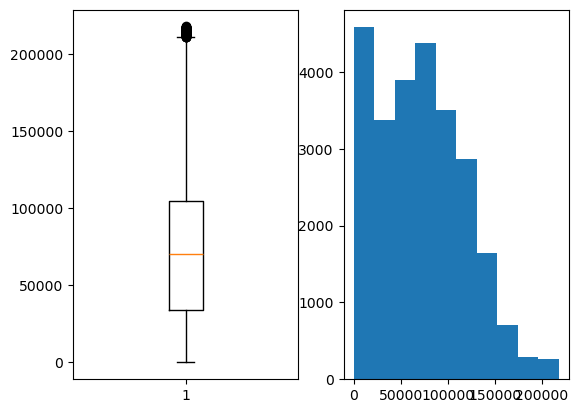

In [12]:
plt.subplot(1,2,1)
plt.boxplot(visa_df["prevailing_wage_update"])
plt.subplot(1,2,2)
plt.hist(visa_df["prevailing_wage_update"])
plt.show

In [13]:
cat_col=visa_df.select_dtypes(include="object").columns
num_col=visa_df.select_dtypes(exclude="object").columns

**bi variate analysis**
- we perfrom see uni varite analysis 
- we perfrom the catcolumn analysis
- ferequent table
- bar chart
- pie chart
- we perfrom the catcolumn analysis
- histogram
- distribution plot
- outliers
- fill the outliers
- now we do categorical-categorical analysis
- categoril analysis
- numerical analysis 

**categorical-categorical**
- lets consider two columns
- -continent
- case_status

In [16]:
visa_df["continent"].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [17]:
visa_df["case_status"].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**th\ask**
- find the certified obserbtion conintnt wise
- find denied  obserbtion conintnt wise

In [19]:
con1=visa_df["continent"]=="Asia"
con2=visa_df["case_status"]=="Certified"
con3=con1&con2
visa_df[con3][["continent","case_status"]]


,continent,case_status
1,Asia,Certified
5,Asia,Certified
6,Asia,Certified
8,Asia,Certified
10,Asia,Certified
...,...,...
25475,Asia,Certified
25476,Asia,Certified
25477,Asia,Certified
25478,Asia,Certified


In [20]:
l=[]
for i in visa_df["continent"].unique():
        for j in visa_df["case_status"].unique():
            con1=visa_df["continent"]==i
            con2=visa_df["case_status"]==j
            con=con1 &con2
            l.append(visa_df[con][["continent","case_status"]])
l

[      continent case_status
 0          Asia      Denied
 2          Asia      Denied
 3          Asia      Denied
 11         Asia      Denied
 15         Asia      Denied
 ...         ...         ...
 25450      Asia      Denied
 25452      Asia      Denied
 25454      Asia      Denied
 25459      Asia      Denied
 25461      Asia      Denied
 
 [5849 rows x 2 columns],
       continent case_status
 1          Asia   Certified
 5          Asia   Certified
 6          Asia   Certified
 8          Asia   Certified
 10         Asia   Certified
 ...         ...         ...
 25475      Asia   Certified
 25476      Asia   Certified
 25477      Asia   Certified
 25478      Asia   Certified
 25479      Asia   Certified
 
 [11012 rows x 2 columns],
       continent case_status
 242      Africa      Denied
 273      Africa      Denied
 895      Africa      Denied
 908      Africa      Denied
 1068     Africa      Denied
 ...         ...         ...
 24557    Africa      Denied
 24627    Afric

In [21]:
colm=visa_df.columns

In [22]:
l=[]
for i in visa_df["continent"].unique():
    for j in visa_df["case_status"].unique():
        con1=visa_df["continent"]==i
        con2=visa_df["case_status"]==j
        con=con1&con2
        l.append(visa_df[con][["continent","case_status"]])
l

[      continent case_status
 0          Asia      Denied
 2          Asia      Denied
 3          Asia      Denied
 11         Asia      Denied
 15         Asia      Denied
 ...         ...         ...
 25450      Asia      Denied
 25452      Asia      Denied
 25454      Asia      Denied
 25459      Asia      Denied
 25461      Asia      Denied
 
 [5849 rows x 2 columns],
       continent case_status
 1          Asia   Certified
 5          Asia   Certified
 6          Asia   Certified
 8          Asia   Certified
 10         Asia   Certified
 ...         ...         ...
 25475      Asia   Certified
 25476      Asia   Certified
 25477      Asia   Certified
 25478      Asia   Certified
 25479      Asia   Certified
 
 [11012 rows x 2 columns],
       continent case_status
 242      Africa      Denied
 273      Africa      Denied
 895      Africa      Denied
 908      Africa      Denied
 1068     Africa      Denied
 ...         ...         ...
 24557    Africa      Denied
 24627    Afric

In [23]:
l1=[]
l2=[]
for i in visa_df["continent"].unique():
    con1= visa_df["continent"]==i
    con2=visa_df["case_status"]=="Certified"
    con3=visa_df["case_status"]=="Denied"
    cer=con1 & con2
    den=con1 & con3
    n_cer=len(visa_df[cer])
    n_den=len(visa_df[den])
    l1.append(n_cer)
    l2.append(n_den)
l1,l2

([11012, 397, 2037, 2957, 493, 122], [5849, 154, 1255, 775, 359, 70])

In [24]:
cnt=visa_df["continent"].unique()
col=["certified","denied"]
pd.DataFrame(zip(l1,l2),columns=col,index=cnt)

,certified,denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**cross Tab**
- the above datafrmae we can make by using method.
- it is avilable in pandas
- it takes two argument
- index
- columns
- in the avobve datta frame col = continent
- in the avobve datta frame index = case_status

In [26]:
idx=visa_df["continent"]
col=visa_df["case_status"]
dfs=pd.crosstab(idx,col)
dfs

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

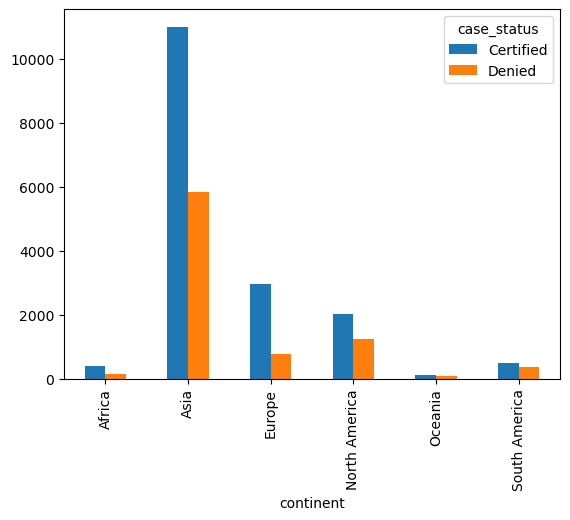

In [27]:
dfs.plot(kind="bar")

In [139]:
df3.plot(kind="bar")

NameError: name 'df3' is not defined

$multivarient analysis$
- education
- continent
- case status
- here also
- first fix your index of any one columns 

In [32]:
idx=visa_df["continent"]
data=[visa_df["education_of_employee"],visa_df["case_status"]]
df5=pd.crosstab(idx,data)
df5

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

<Axes: xlabel='continent'>

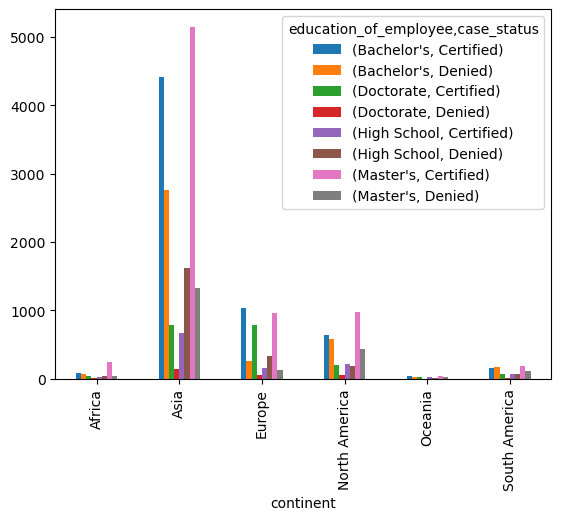

In [34]:
df5.plot(kind="bar")

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
visa_df=pd.read_csv("visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [40]:
num_col=visa_df.select_dtypes(exclude="object").columns
num_col

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [42]:
no_col=visa_df["no_of_employees"]
no_col

0        14513
1         2412
2        44444
3           98
4         1082
         ...  
25475     2601
25476     3274
25477     1121
25478     1918
25479     3195
Name: no_of_employees, Length: 25480, dtype: int64

In [44]:
q1=np.percentile(visa_df["no_of_employees"],25)
q2=np.percentile(visa_df["no_of_employees"],50)
q3=np.percentile(visa_df["no_of_employees"],75)
iqr=q3-q1
iqr

2482.0

In [46]:
lb=q1-1.5*iqr
ub=q3+1.5*iqr
lb,ub

(-2701.0, 7227.0)

{'whiskers': [<matplotlib.lines.Line2D at 0x13572e5e450>,
 'caps': [<matplotlib.lines.Line2D at 0x13572e5f9e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13572e5cbc0>],
 'medians': [<matplotlib.lines.Line2D at 0x13572e5dd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x13572e5df40>],
 'means': []}

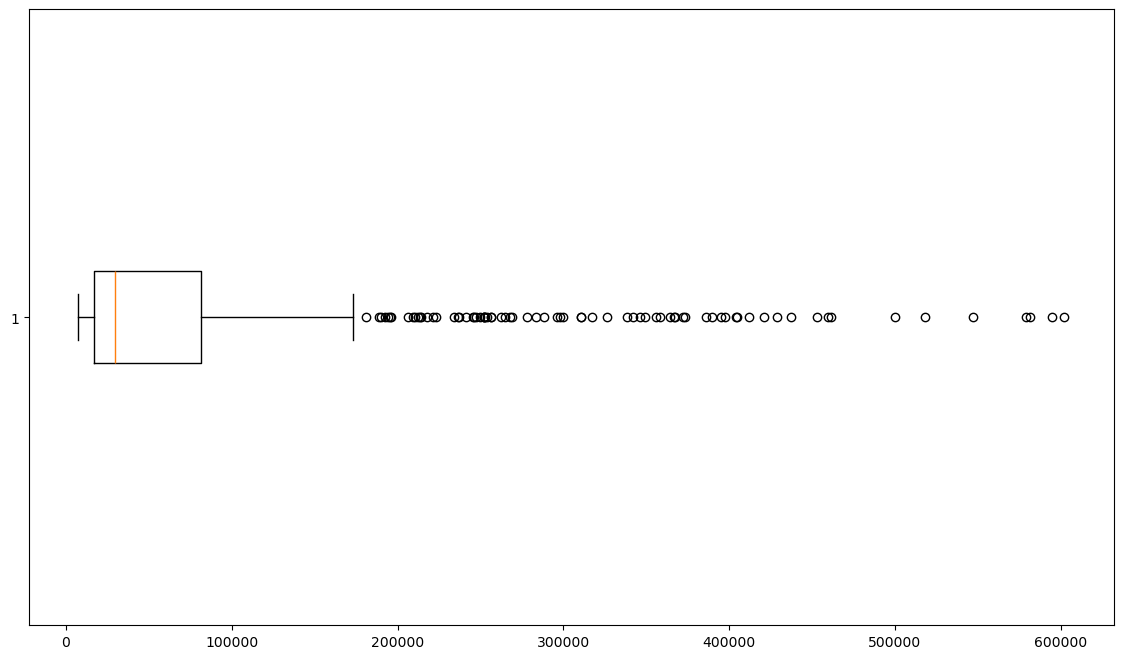

In [48]:
con1=no_col<lb
con2=no_col>ub
con=con1 | con2
outliert_df=visa_df[con]
n=outliert_df["no_of_employees"]
plt.figure(figsize=(14,8))
plt.boxplot(n,vert=False)

In [50]:
con1=no_col>lb
con2=no_col<ub
con=con1 & con2
non_outliers_df=visa_df[con]


In [52]:
wage=non_outliers_df["no_of_employees"]

{'whiskers': [<matplotlib.lines.Line2D at 0x13570b0a4b0>,
 'caps': [<matplotlib.lines.Line2D at 0x13572a38350>,
 'boxes': [<matplotlib.lines.Line2D at 0x13572ac8950>],
 'medians': [<matplotlib.lines.Line2D at 0x13572a38d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x13572a3b6b0>],
 'means': []}

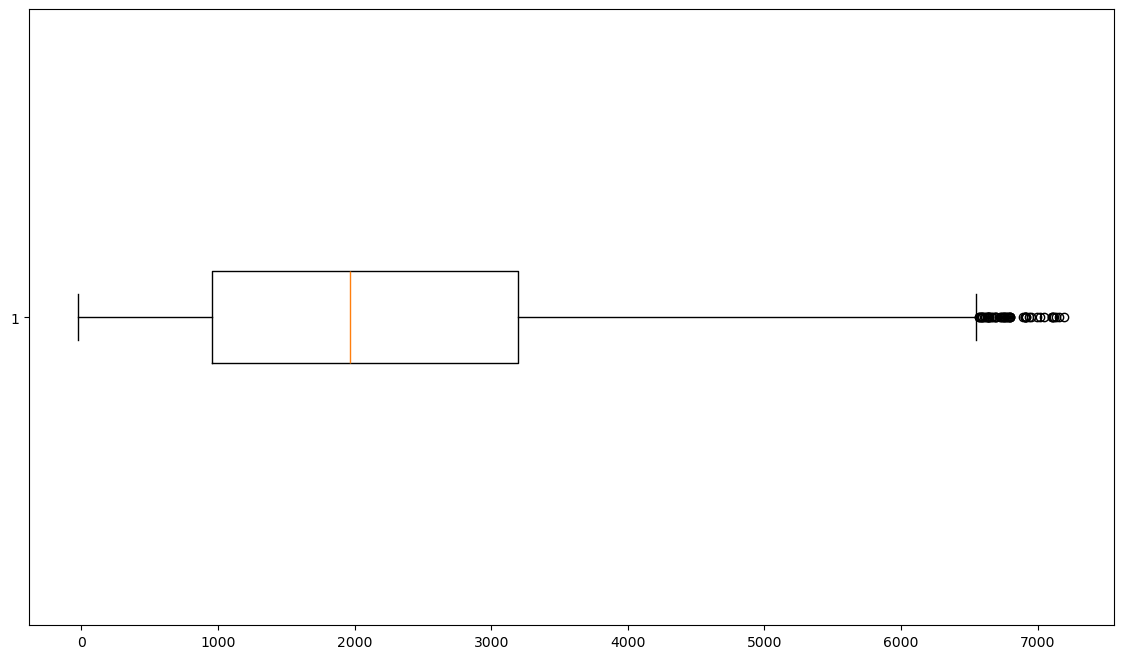

In [54]:
plt.figure(figsize=(14,8))
plt.boxplot(wage,vert=False)

In [56]:
no_col=visa_df["no_of_employees"]

(array([2.4835e+04, 2.4900e+02, 2.2700e+02, 8.7000e+01, 1.3000e+01,
        1.2000e+01, 1.7000e+01, 8.0000e+00, 7.0000e+00, 9.0000e+00,
        6.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00, 4.0000e+00]),
 array([-2.60000000e+01,  4.01136667e+04,  8.02533333e+04,  1.20393000e+05,
         1.60532667e+05,  2.00672333e+05,  2.40812000e+05,  2.80951667e+05,
         3.21091333e+05,  3.61231000e+05,  4.01370667e+05,  4.41510333e+05,
         4.81650000e+05,  5.21789667e+05,  5.61929333e+05,  6.02069000e+05]),
 <BarContainer object of 15 artists>)

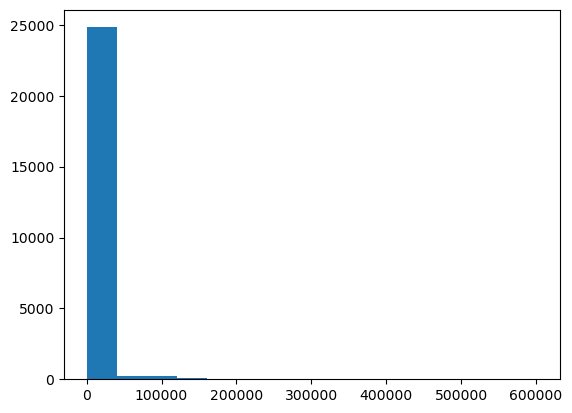

In [58]:
plt.hist(no_col,bins=15)

(array([2805., 3051., 2845., 2884., 2562., 2383., 1953., 1700., 1258.,
        1044.,  700.,  401.,  227.,   79.,   32.]),
 array([ -26. ,  455.4,  936.8, 1418.2, 1899.6, 2381. , 2862.4, 3343.8,
        3825.2, 4306.6, 4788. , 5269.4, 5750.8, 6232.2, 6713.6, 7195. ]),
 <BarContainer object of 15 artists>)

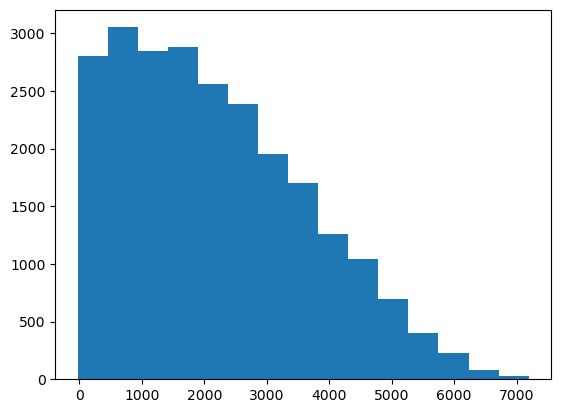

In [60]:
plt.hist(wage,bins=15)

In [62]:
#remove the outliers
#replace the outliers
#replace with meanvalue

In [64]:
no_col

0        14513
1         2412
2        44444
3           98
4         1082
         ...  
25475     2601
25476     3274
25477     1121
25478     1918
25479     3195
Name: no_of_employees, Length: 25480, dtype: int64

In [66]:
con1=no_col<lb
col2=no_col>ub
con=con1|con2
con

0        False
1         True
2        False
3         True
4         True
         ...  
25475     True
25476     True
25477     True
25478     True
25479     True
Name: no_of_employees, Length: 25480, dtype: bool

In [68]:
median=np.median(visa_df["no_of_employees"])
median

2109.0

In [70]:
m=np.where(con,median,no_col)
m

array([14513.,  2109., 44444., ...,  2109.,  2109.,  2109.])

In [72]:
c=0
for i in m:
    if i==median:
        c+=1
print(c)

23924


$Numerical-Numerical$

- to understand numerical columns relation we need scater plot
- scatter plot gives the relation between two numerical columns
- bar-pie-histogram-scatter
- scater under the matplotlip package
- plt.scatter

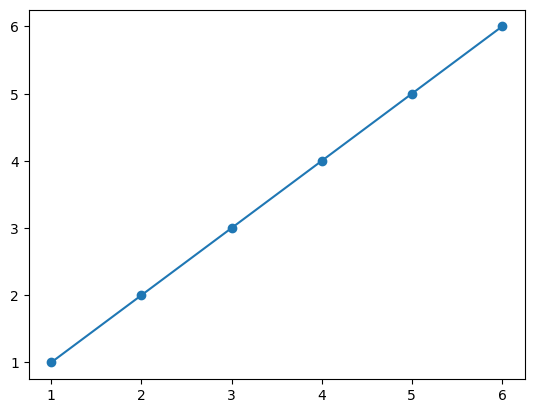

In [86]:
x=[1,2,3,4,5,6]
y=[1,2,3,4,5,6]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

$Parabola$

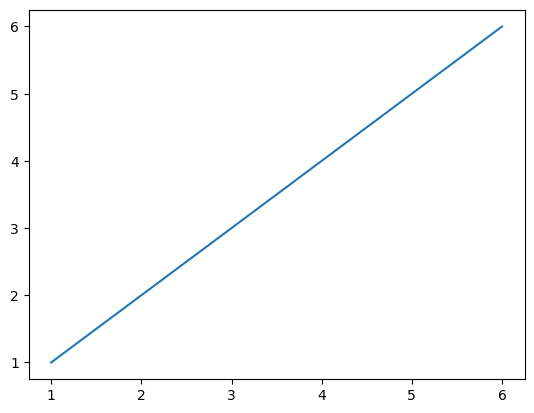

In [90]:
x=[1,2,3,4,5,6]
y=[1,2,3,4,5,6]
#plt.scatter(x,y)
plt.plot(x,y)
plt.show()

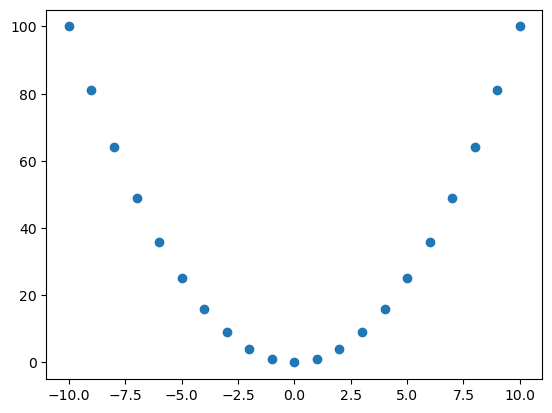

In [92]:
x=[i for i in range(-10,11)]
y=[i*i for i in x]
plt.scatter(x,y)

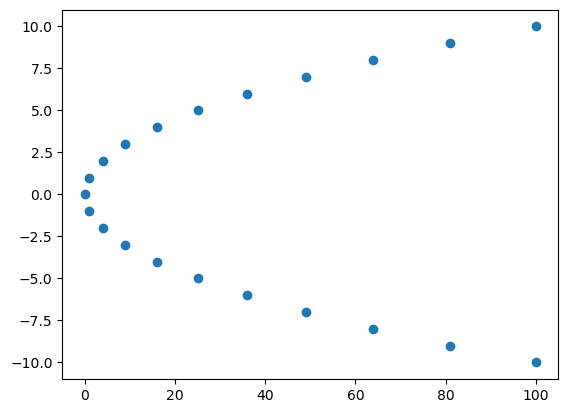

In [96]:
x=[i for i in range(-10,11)]
y=[i*i for i in x]
plt.scatter(y,x)

In [100]:
num_col

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

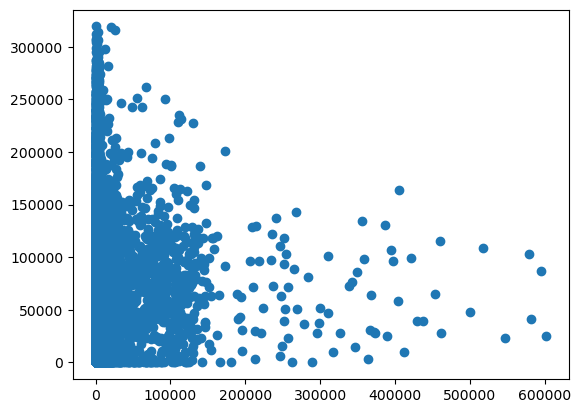

In [102]:
n1=visa_df["no_of_employees"]
n2=visa_df["prevailing_wage"]
plt.scatter(n1,n2)

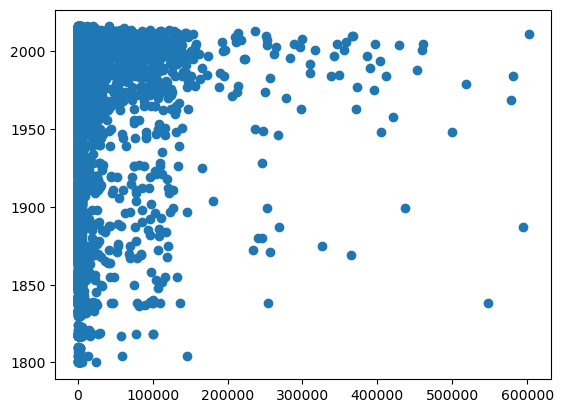

In [104]:
n1=visa_df["no_of_employees"]
n2=visa_df["yr_of_estab"]
plt.scatter(n1,n2)

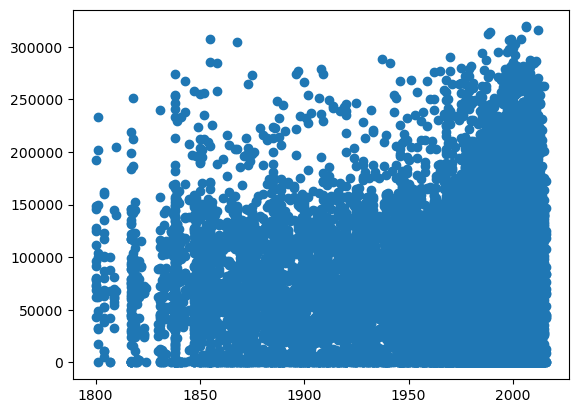

In [106]:
n1=visa_df["yr_of_estab"]
n2=visa_df["prevailing_wage"]
plt.scatter(n1,n2)

In [ ]:
n1=visa_df["no_of_employees"]
n2=visa_df["yr_of_estab"]
n3=visa_df["prevailing_wage"]
plt.figure(figsize=(14,3))
plt.subplot(1,3,1).scatter(n1,n2)
plt.xlabel("no_of_employees")
plt.ylablel("ye")

- implement the covarience function
- covarience vs correlation
- covarience will tell about the columns have relation or not
- correlation 

In [112]:
#method name : corr#
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


In [ ]:
#heatmap
- it is one of the important method , to show the matrix from of value
- it is under se born package
- in every matrix heighest value and lowest values avilabel
- heat map will give colour visulization
- also it provide colorbar which clor indicate

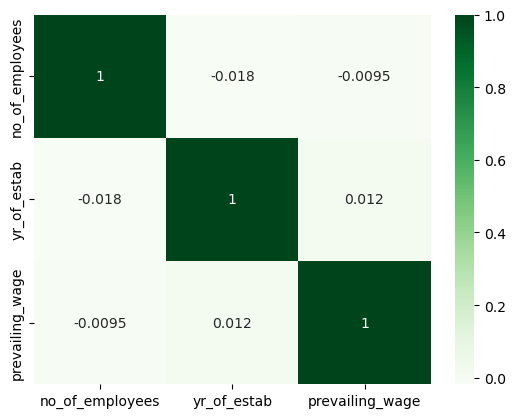

In [132]:
c=visa_df.corr(numeric_only=True)
sns.heatmap(c,annot=True,cmap="Greens")
plt.show()

In [136]:
c=visa_df.corr(numeric_only=True)
sns.heatmap(c,annot=True,cmap="Whites")
plt.show()

KeyError: "'Whites' is not a known colormap name"

- by seeing the graphs we might not say the relation status
- it is best practice get the presentage of reklation using correlation
- which indicate all the col having no relation
- no rellat men s indepennd each other
- in ML we expect the input col should be independent each other
- corr method gives matrix view
- we have 3 col 3*3 total 9 feald
- if a databhas 20 col then 20*20 fields
- that why always goes with heat map